# Multiple Linear Regression

#### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np

## EDA for the dataset

#### Reading from CSV

In [2]:
day = pd.read_csv("day.csv")

#### Exploring the dataset

In [3]:
day.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [4]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
day.describe().round(2)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.00,730.00,730.0,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00,730.00
mean,365.50,2.50,0.5,6.53,0.03,3.00,0.68,1.39,20.32,23.73,62.77,12.76,849.25,3658.76,4508.01
std,210.88,1.11,0.5,3.45,0.17,2.01,0.47,0.54,7.51,8.15,14.24,5.20,686.48,1559.76,1936.01
min,1.00,1.00,0.0,1.00,0.00,0.00,0.00,1.00,2.42,3.95,0.00,1.50,2.00,20.00,22.00
25%,183.25,2.00,0.0,4.00,0.00,1.00,0.00,1.00,13.81,16.89,52.00,9.04,316.25,2502.25,3169.75
50%,365.50,3.00,0.5,7.00,0.00,3.00,1.00,1.00,20.47,24.37,62.62,12.13,717.00,3664.50,4548.50
75%,547.75,3.00,1.0,10.00,0.00,5.00,1.00,2.00,26.88,30.45,72.99,15.63,1096.50,4783.25,5966.00
max,730.00,4.00,1.0,12.00,1.00,6.00,1.00,3.00,35.33,42.04,97.25,34.00,3410.00,6946.00,8714.00


In [6]:
day.shape

(730, 16)

#### checking for nulls

In [7]:
day.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

#### checking for invalid datatypes

In [8]:
day.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

#### Dropping unwanted columns

In [9]:
day = day.drop(['instant','dteday','casual','registered'],axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### changing datatypes of required columns

Changing the data types of few columns as strings to fill them with their equivalent strings

In [10]:
day['season'] = day['season'].astype(str)

In [11]:
day['mnth'] = day['mnth'].astype(str)

In [12]:
day['weekday'] = day['weekday'].astype(str)

In [13]:
day.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [14]:
month_list = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

In [15]:
month_list[1]

'feb'

In [16]:

day['mnth'] = day['mnth'].apply(lambda x: (month_list[int(x)-1]))
day['mnth']

0      jan
1      jan
2      jan
3      jan
4      jan
      ... 
725    dec
726    dec
727    dec
728    dec
729    dec
Name: mnth, Length: 730, dtype: object

In [17]:
weather_sit_list = ['clear','mist','light_snow','heavy_rain']

In [18]:
day['weathersit'].value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

In [19]:
day['weathersit'] = day['weathersit'].apply(lambda x: weather_sit_list[int(x)-1])

In [20]:
weekday_list = ['sun','mon','tue','wed','thu','fri','sat']

In [21]:
day['weekday'] = day['weekday'].apply(lambda x: weekday_list[int(x)])
day['weekday']

0      sat
1      sun
2      mon
3      tue
4      wed
      ... 
725    thu
726    fri
727    sat
728    sun
729    mon
Name: weekday, Length: 730, dtype: object

In [22]:
seasons_list = ['spring','summer','fall','winter']

In [23]:
day['season'] = day['season'].apply(lambda x: seasons_list[int(x)-1])

In [24]:
day['season'].value_counts()

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64

In [25]:
day.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

In [26]:
num_cols_day = ['yr','holiday','workingday','weathersit','temp','atemp','hum','windspeed','cnt']

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Correlation coefficients

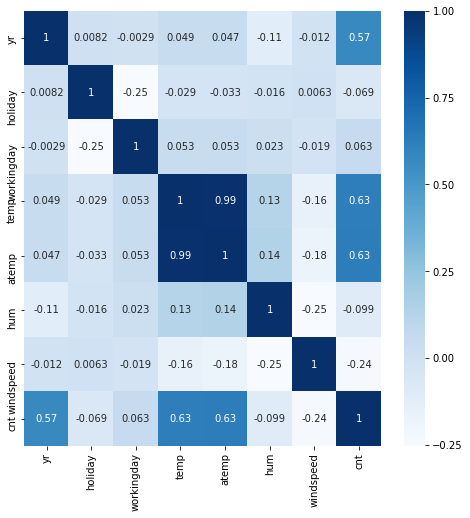

In [28]:
plt.figure(figsize=(8,8))
ax = sns.heatmap(day[num_cols_day].corr(),annot=True,cmap='Blues')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Year and temp are having high correlation with the target variable cnt

#### Pair plot

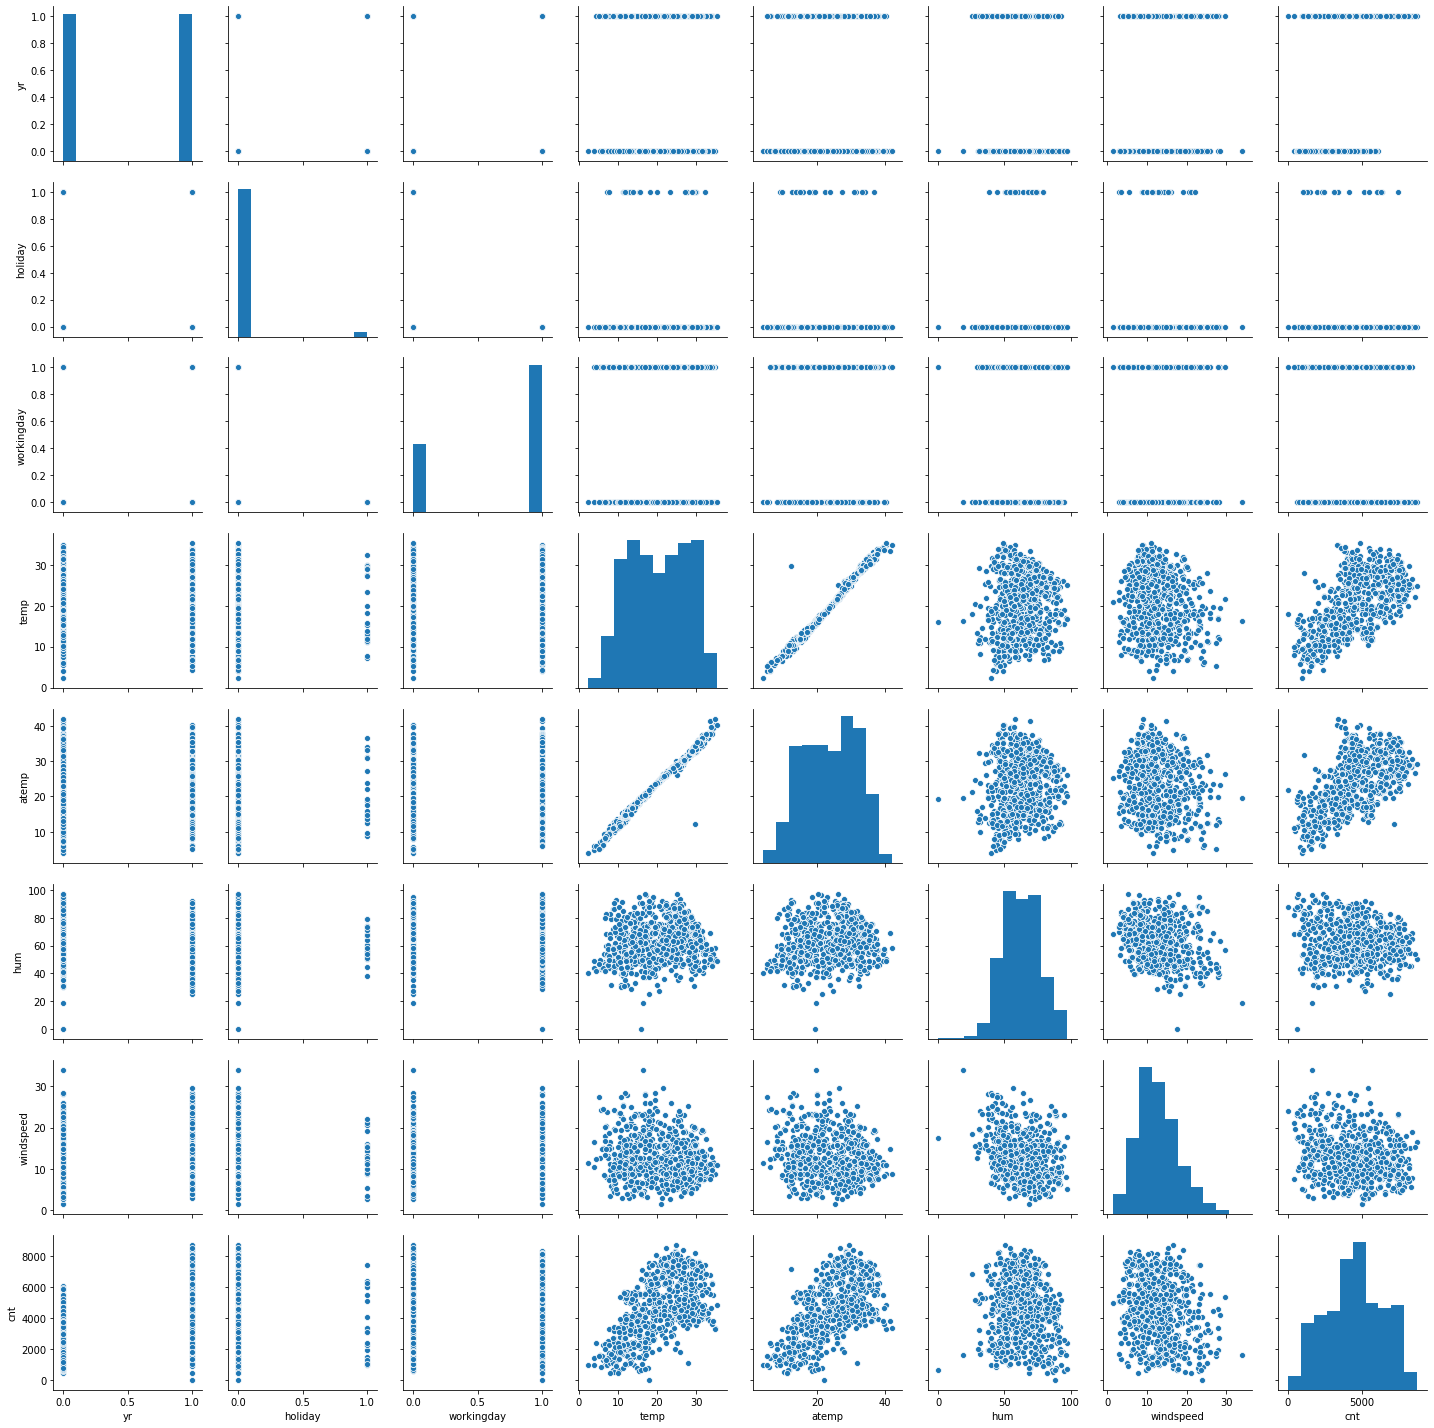

In [29]:
sns.pairplot(day)
plt.show()

Temp and atemp are having high correlation with target variable

#### getting dummy variables for categories

In [30]:
status = pd.get_dummies(day['season'],drop_first=True)
status.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [31]:
day = pd.concat([day,status],axis=1)
day.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,spring,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,spring,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,spring,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,spring,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,spring,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [32]:
day = day.drop('season',axis=1)

In [33]:
day.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0
1,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0
2,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0
3,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0
4,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0


In [34]:
status = pd.get_dummies(day['weekday'],drop_first=True)
status.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [35]:
day = pd.concat([day,status],axis=1)
day.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,mon,sat,sun,thu,tue,wed
0,0,jan,0,sat,0,mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0
1,0,jan,0,sun,0,mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0
2,0,jan,0,mon,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0
3,0,jan,0,tue,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0
4,0,jan,0,wed,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1


In [36]:
day = day.drop('weekday',axis=1)


In [37]:
day.head()

,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,summer,winter,mon,sat,sun,thu,tue,wed
0,0,jan,0,0,mist,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,0,0,0
1,0,jan,0,0,mist,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0,1,0,0,0
2,0,jan,0,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0,0,0,0,0
3,0,jan,0,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,1,0
4,0,jan,0,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1


In [38]:
status = pd.get_dummies(day.mnth,drop_first=True)
status

,aug,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
725,0,1,0,0,0,0,0,0,0,0,0
726,0,1,0,0,0,0,0,0,0,0,0
727,0,1,0,0,0,0,0,0,0,0,0
728,0,1,0,0,0,0,0,0,0,0,0


In [39]:
day = pd.concat([day,status],axis=1)
day.head()

,yr,mnth,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,jan,0,0,mist,14.110847,18.18125,80.5833,10.749882,985,...,0,0,1,0,0,0,0,0,0,0
1,0,jan,0,0,mist,14.902598,17.68695,69.6087,16.652113,801,...,0,0,1,0,0,0,0,0,0,0
2,0,jan,0,1,clear,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,1,0,0,0,0,0,0,0
3,0,jan,0,1,clear,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,1,0,0,0,0,0,0,0
4,0,jan,0,1,clear,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,1,0,0,0,0,0,0,0


In [40]:
day = day.drop('mnth',axis=1)
day.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,dec,feb,jan,jul,jun,mar,may,nov,oct,sep
0,0,0,0,mist,14.110847,18.18125,80.5833,10.749882,985,1,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,801,1,...,0,0,1,0,0,0,0,0,0,0
2,0,0,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,0,0,1,0,0,0,0,0,0,0


In [41]:
status = pd.get_dummies(day.weathersit,drop_first=True)
status

,light_snow,mist
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0
...,...,...
725,0,1
726,0,1
727,0,1
728,0,0


In [42]:
day = pd.concat([day,status],axis=1)
day.head()

,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,spring,...,jan,jul,jun,mar,may,nov,oct,sep,light_snow,mist
0,0,0,0,mist,14.110847,18.18125,80.5833,10.749882,985,1,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,mist,14.902598,17.68695,69.6087,16.652113,801,1,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,clear,8.050924,9.47025,43.7273,16.636703,1349,1,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,clear,8.200000,10.60610,59.0435,10.739832,1562,1,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,clear,9.305237,11.46350,43.6957,12.522300,1600,1,...,1,0,0,0,0,0,0,0,0,0


In [43]:
day = day.drop('weathersit',axis=1)

#### scaling the numerical columns using Normalization

In [44]:
day.cnt = day['cnt'].astype(float)

In [45]:
vars_toscale = ['temp','atemp','hum','windspeed','cnt']

In [46]:
for var in vars_toscale:
    minimum = day[var].min()
    maximum = day[var].max()
    day[var] = day[var].apply(lambda x: (x-minimum)/(maximum-minimum))

day.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,...,jan,jul,jun,mar,may,nov,oct,sep,light_snow,mist
0,0,0,0,0.355170,0.373517,0.828620,0.284606,0.110792,1,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0.379232,0.360541,0.715771,0.466215,0.089623,1,0,...,1,0,0,0,0,0,0,0,0,1
2,0,0,1,0.171000,0.144830,0.449638,0.465740,0.152669,1,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,1,0.175530,0.174649,0.607131,0.284297,0.177174,1,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,1,0.209120,0.197158,0.449313,0.339143,0.181546,1,0,...,1,0,0,0,0,0,0,0,0,0


#### splitting test and training set

In [47]:
import sklearn
from sklearn.model_selection import train_test_split

In [48]:
day.shape

(730, 30)

In [49]:
day_train,day_test = train_test_split(day,train_size=0.7,random_state=100)
day_train.shape,day_test.shape

((510, 30), (220, 30))

In [50]:
y_train = day_train.pop('cnt')
x_train = day_train

y_train.shape,x_train.shape

((510,), (510, 29))

#### Fitting a model using sklearn to find RFE

In [51]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [52]:
lm=LinearRegression()

In [53]:
lm.fit(x_train,y_train)
rfe = RFE(lm,15)
rfe = rfe.fit(x_train,y_train)

In [54]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('jul', True, 1),
 ('jun', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('light_snow', True, 1),
 ('mist', True, 1)]

In [55]:
col = x_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'spring',
       'summer', 'winter', 'sat', 'jan', 'jul', 'sep', 'light_snow', 'mist'],
      dtype='object')

In [56]:
x_train.columns[~rfe.support_]

Index(['atemp', 'mon', 'sun', 'thu', 'tue', 'wed', 'aug', 'dec', 'feb', 'jun',
       'mar', 'may', 'nov', 'oct'],
      dtype='object')

#### Building model

In [57]:
x_train_rfe = x_train[col]

In [58]:
import statsmodels.api as sm  
x_train_rfe = sm.add_constant(x_train_rfe)

C:\Users\Sowmya Surampalli\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [59]:
lm0 = sm.OLS(y_train,x_train_rfe).fit()

In [60]:
print(lm0.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          4.22e-191
Time:                        19:07:59   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2599      0.037      7.104      0.0

In [61]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,86.63
7,spring,5.08
4,temp,3.89
9,winter,3.59
8,summer,2.65
5,hum,1.91
3,workingday,1.88
10,sat,1.78
11,jan,1.57
15,mist,1.57


#### Manual modelling

#### Eliminating spring variable since it has high VIF

In [62]:
col = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'summer', 'winter', 'sat', 'jan', 'jul', 'sep', 'light_snow', 'mist']

In [63]:
x_train_rfe = x_train[col]

In [64]:
x_train_rfe = sm.add_constant(x_train_rfe)

In [65]:
lm1 = sm.OLS(y_train,x_train_rfe).fit()

In [66]:
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     194.8
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          5.98e-191
Time:                        19:07:59   Log-Likelihood:                 516.53
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     495   BIC:                            -939.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2094      0.030      6.876      0.0

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,59.43
4,temp,2.07
5,hum,1.89
3,workingday,1.88
9,sat,1.78
14,mist,1.56
10,jan,1.55
8,winter,1.53
11,jul,1.43
7,summer,1.41


#### Eliminating Jan

In [68]:
col = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'summer', 'winter', 'sat', 'jul', 'sep', 'light_snow', 'mist']

In [69]:
x_train_rfe = x_train[col]

In [70]:
x_train_rfe = sm.add_constant(x_train_rfe)

In [71]:
lm2 = sm.OLS(y_train,x_train_rfe).fit()

In [72]:
print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.6
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          5.23e-191
Time:                        19:08:00   Log-Likelihood:                 513.89
No. Observations:                 510   AIC:                            -999.8
Df Residuals:                     496   BIC:                            -940.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1902      0.029      6.474      0.0

In [73]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,54.88
3,workingday,1.88
5,hum,1.88
9,sat,1.78
4,temp,1.60
13,mist,1.56
10,jul,1.43
7,summer,1.33
8,winter,1.29
12,light_snow,1.24


#### Dropping Humidity

In [74]:
col = ['yr', 'holiday', 'workingday', 'temp', 'windspeed',
       'summer', 'winter', 'sat', 'jul', 'sep', 'light_snow', 'mist']

In [75]:
x_train_rfe = x_train[col]
x_train_rfe = sm.add_constant(x_train_rfe)
lm3 = sm.OLS(y_train,x_train_rfe).fit()
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     214.4
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          1.13e-187
Time:                        19:08:00   Log-Likelihood:                 503.16
No. Observations:                 510   AIC:                            -980.3
Df Residuals:                     497   BIC:                            -925.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0880      0.020      4.467      0.0

In [76]:
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,23.71
3,workingday,1.87
8,sat,1.77
4,temp,1.50
9,jul,1.42
6,summer,1.33
7,winter,1.25
10,sep,1.19
2,holiday,1.16
5,windspeed,1.09


#### Dropping Holiday

In [77]:
col = ['yr', 'workingday', 'temp', 'windspeed',
       'summer', 'winter', 'sat', 'jul', 'jan','sep', 'light_snow', 'mist']

In [78]:
x_train_rfe = x_train[col]
x_train_rfe = sm.add_constant(x_train_rfe)
lm4 = sm.OLS(y_train,x_train_rfe).fit()
print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     215.5
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          3.66e-188
Time:                        19:08:01   Log-Likelihood:                 504.33
No. Observations:                 510   AIC:                            -982.7
Df Residuals:                     497   BIC:                            -927.6
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1054      0.022      4.843      0.0

In [79]:
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,29.08
3,temp,1.92
2,workingday,1.65
7,sat,1.63
9,jan,1.54
6,winter,1.47
8,jul,1.42
5,summer,1.41
10,sep,1.19
4,windspeed,1.10


#### Dropping Jan

In [80]:
col = ['yr', 'workingday', 'temp', 'windspeed',
       'summer', 'winter', 'sat', 'jul', 'sep', 'light_snow', 'mist']

In [81]:
x_train_rfe = x_train[col]
x_train_rfe = sm.add_constant(x_train_rfe)
lm5 = sm.OLS(y_train,x_train_rfe).fit()
print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     231.8
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          6.72e-188
Time:                        19:08:01   Log-Likelihood:                 500.87
No. Observations:                 510   AIC:                            -977.7
Df Residuals:                     498   BIC:                            -926.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0783      0.019      4.073      0.0

In [82]:
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.44
2,workingday,1.65
7,sat,1.63
3,temp,1.50
8,jul,1.42
5,summer,1.33
6,winter,1.25
9,sep,1.18
4,windspeed,1.09
10,light_snow,1.05


#### Dropping July

In [83]:
col = ['yr', 'workingday', 'temp', 'windspeed',
       'summer', 'winter', 'sat', 'sep', 'light_snow', 'mist']

In [84]:
x_train_rfe = x_train[col]
x_train_rfe = sm.add_constant(x_train_rfe)
lm6 = sm.OLS(y_train,x_train_rfe).fit()
print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     253.0
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          3.13e-188
Time:                        19:08:01   Log-Likelihood:                 498.79
No. Observations:                 510   AIC:                            -975.6
Df Residuals:                     499   BIC:                            -929.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0817      0.019      4.247      0.0

In [85]:
vif = pd.DataFrame()
X = x_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,22.27
2,workingday,1.65
7,sat,1.63
6,winter,1.21
3,temp,1.20
5,summer,1.19
8,sep,1.10
4,windspeed,1.09
9,light_snow,1.05
10,mist,1.04


In [86]:
col = ['yr', 'temp', 'windspeed', 'summer', 'winter', 'light_snow', 'mist']
x_train_rfe = x_train[col]
x_train_rfe = sm.add_constant(x_train_rfe)
lm = sm.OLS(y_train,x_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     311.5
Date:                Sun, 19 Apr 2020   Prob (F-statistic):          3.78e-178
Time:                        19:08:02   Log-Likelihood:                 466.25
No. Observations:                 510   AIC:                            -916.5
Df Residuals:                     502   BIC:                            -882.6
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1277      0.018      6.996      0.0

#### Residual Analysis of the data

In [87]:
y_train_cnt = lm.predict(x_train_rfe)

Text(0.5, 0, 'Errors')

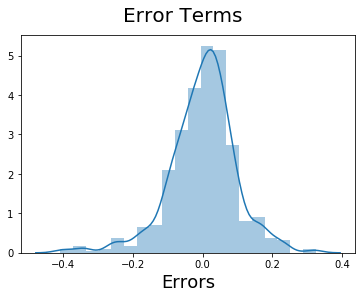

In [88]:
fig = plt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)  

Errors are normally distributed over the mean 0

#### Making Predictions

In [89]:
y_test = day_test.pop('cnt')
X_test = day_test

In [90]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[col]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [91]:
y_pred = lm.predict(X_test_new)

In [92]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7818609494784341

#### Model Evaluation

Text(0, 0.5, 'y_pred')

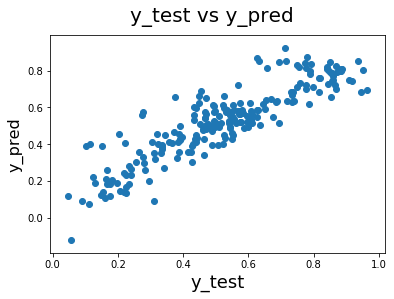

In [93]:
fig = plt.figure()
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 